# CNN with Cifar10

In [1]:
%%time

from keras.datasets import cifar10

((X_train, y_train), (X_test, y_test)) =cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 30s 0us/step
CPU times: user 5.09 s, sys: 2.35 s, total: 7.44 s
Wall time: 33.9 s


In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


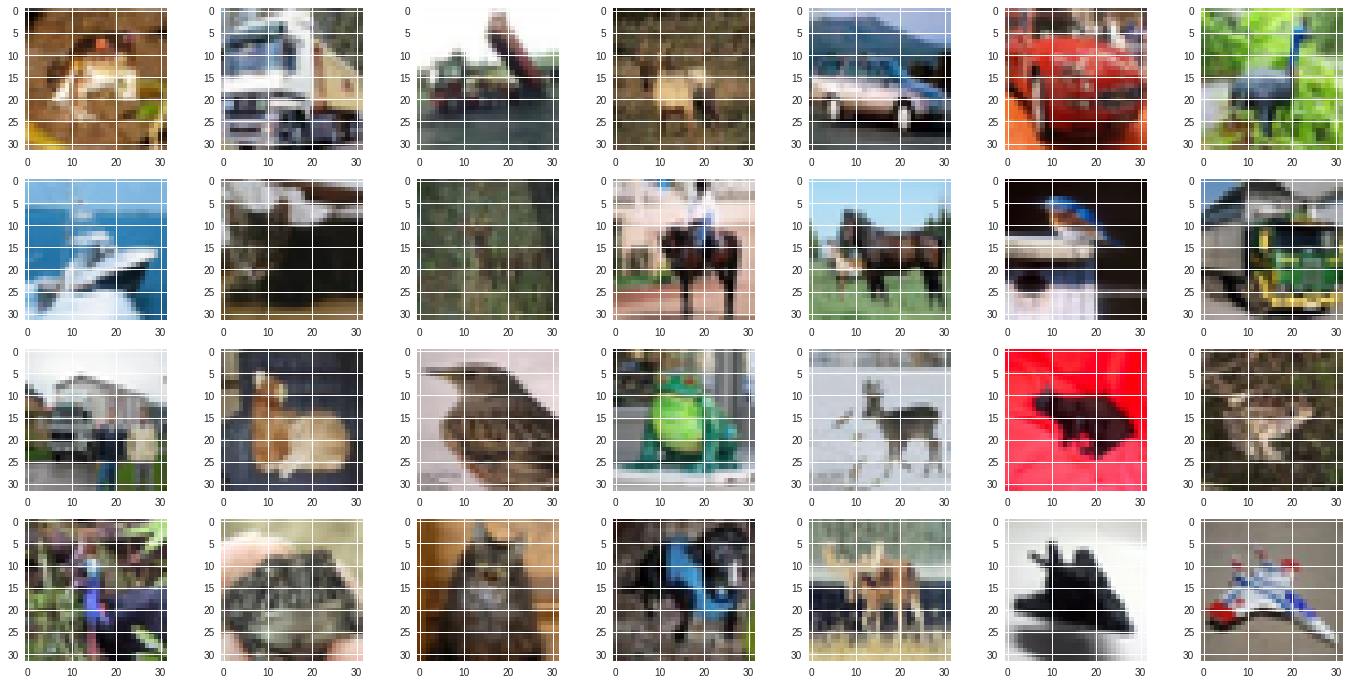

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=7)
figure.set_size_inches(24, 12)

for row in range(4):
  for col in range(7):
    axes[row][col].imshow(X_train[row*8+col])
    
plt.show()

## 전처리

In [4]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print(y_train_hot.shape, y_test_hot.shape)

(50000, 10) (10000, 10)


In [0]:
# RGB를 0~1사이로 만들기
X_train = X_train /255
X_test = X_test/255

In [9]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [10]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [12]:
print(X_train[0].shape)
print(X_train[0][0])
print(X_train[0][31])

(32, 32, 3)
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56470588 0.43921569 0.3372549 ]
 [0.5372549  0.41176471 0.30980392]
 [0.50588235 0.38039216 0.27843137]
 [0.5372549  0.41568627 0.30980392]
 [0.5254902  0.41568627 0.29803922]
 [0.48627451 0.38039216 0.25098039]
 [0.54509804 0.44313725 0.30588235]
 [0.54509804 0.43921569 0.29411765]
 [0.52156863 0.41176471 0.27058824]
 [0.53333333 0.41176471 0.29019608]
 [0.54509804 0.42352941 0.30196078]
 [0.59607843 0.47058824 0.34901961]
 [0.63921569 0.51372549 0.39215686]
 [0.65882353 0.53333333 0.42352941]
 [0.62352941 0.5

In [16]:
print(X_train[0][0][0])

print(X_train[0][0][31])

[0.23137255 0.24313725 0.24705882]
[0.58039216 0.48627451 0.40392157]


In [0]:
import numpy as np

In [20]:
a=np.array([1,2,3])
print(a.shape)

(3,)


In [22]:
a=np.array([[1,2,3],[2,3,4]])
print(a.shape)

(2, 3)


In [24]:
a=np.array([[[1,2,3], [1,2,3]]])
print(a.shape)
a

(1, 2, 3)


array([[[1, 2, 3],
        [1, 2, 3]]])

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import SGD, rmsprop, Adam
from keras.initializers import RandomUniform

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                kernel_initializer='he_uniform'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=10,
               activation='sigmoid',
               kernel_initializer='glorot_uniform'))

opt = SGD(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
%%time
model.fit(X_train,
         y_train_hot,
         epochs=20,
         shuffle=True,
         validation_data = (X_test, y_test_hot))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 216s 4ms/step - loss: 1.7492 - acc: 0.3657 - val_loss: 2.1718 - val_acc: 0.3230
Epoch 2/20
50000/50000 [==============================] - 216s 4ms/step - loss: 1.3974 - acc: 0.5025 - val_loss: 1.3257 - val_acc: 0.5267
Epoch 3/20
50000/50000 [==============================] - 218s 4ms/step - loss: 1.2259 - acc: 0.5664 - val_loss: 1.2362 - val_acc: 0.5699
Epoch 4/20
50000/50000 [==============================] - 219s 4ms/step - loss: 1.0970 - acc: 0.6157 - val_loss: 1.2067 - val_acc: 0.5934
Epoch 5/20
50000/50000 [==============================] - 219s 4ms/step - loss: 0.9975 - acc: 0.6527 - val_loss: 1.1168 - val_acc: 0.6154
Epoch 6/20
50000/50000 [==============================] - 219s 4ms/step - loss: 0.9073 - acc: 0.6858 - val_loss: 1.1497 - val_acc: 0.6108
Epoch 7/20
50000/50000 [==============================] - 219s 4ms/step - 

In [29]:
import numpy as np

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

accuracy = (y_test.reshape(-1) == y_predict).mean()

print('Accuracy = {0:.5f}'.format(accuracy))

Accuracy = 0.10000


In [30]:
import pandas as pd

result = pd.DataFrame({'actual':y_test.reshape(-1), 'predict':y_predict})

label_list = result['actual'].unique()

for label in label_list:
  target = result[result['actual']==label]
  
  per_accuracy = (target['actual']==target['predict']).mean()
  
  print(label, per_accuracy)

3 0.0
8 0.0
0 1.0
6 0.0
1 0.0
9 0.0
5 0.0
7 0.0
4 0.0
2 0.0
